<a href="https://colab.research.google.com/github/Emma922/Marketing-E-Commerce-Analysis/blob/main/Marketing_%26_E_Commerce_EDA_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing & E-Commerce EDA and Cleaning

## 1. Introduction  
This project performs a complete **Exploratory Data Analysis (EDA)**, and **Data Cleaning**,

The goal is to explore the dataset’s structure, relationships, and distributions, assess data quality issues like missing values or outliers, and then clean and transform the data for consistency. This ensures the dataset is accurate and business‑ready before moving into funnel, campaign, A/B test, and customer/product analysis.

We will:

- Load and explore all dataset tables (customers, products, campaigns, events, transactions)  
- Assess data structure, quality, and relationships across tables  
- Perform cleaning, detect outliers, and export tables.


# 2. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()


# 3. Load the Datasets

Below is a description of each file:

| File                | Description                                                                 |
|:------------------- |:----------------------------------------------------------------------------|
| customers           | Customer details (country, age, gender, and signup_date for segmentation and cohort analysis). |
| products            | Catalog of products with category, brand, base price, launch timing, and premium flag.      |
| campaigns           | Marketing campaign details (channel, objective, dates, target segments) |
| events              |Fact table of user interactions (views, clicks, carts, purchases) Includes campaign_id and experiment_group for uplift and A/B testing
| transactions        | One row per completed purchase, including quantity, discounts, and gross revenue (refunds as negatives).            |







In [2]:
from google.colab import files
uploaded = files.upload()

Saving events.csv to events.csv
Saving transactions.csv to transactions.csv
Saving products (2).csv to products (2).csv
Saving customers (2).csv to customers (2).csv
Saving campaigns.csv to campaigns.csv


In [4]:
events = pd.read_csv("events.csv")
products = pd.read_csv("products (2).csv")
transactions = pd.read_csv("transactions.csv")
customers = pd.read_csv("customers (2).csv")
campaigns = pd.read_csv("campaigns.csv")

# 4. Preview & Raw Exploration

We begin by inspecting the shape, structure, head, and summary of each dataset.


In [5]:
dfs = {
    "customers": customers,
    "events": events,
    "products": products,
    "transactions": transactions,
    "campaigns": campaigns
}

for name, df in dfs.items():
    print(f"======== {name.upper()} ========")

    display(df.head(3))

    print("\nInfo:")
    display(df.info())

    print("\nDescribe:")
    display(df.describe(include='all')
)

    print("\n\n")



======== CUSTOMERS ========


,customer_id,signup_date,country,age,gender,loyalty_tier,acquisition_channel
0,1,2021-04-08,BR,48,Male,Bronze,Referral
1,2,2023-04-28,IN,36,Female,Silver,Organic
2,3,2022-12-18,UK,35,Female,Silver,Organic



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   customer_id          100000 non-null  int64 
 1   signup_date          100000 non-null  object
 2   country              100000 non-null  object
 3   age                  100000 non-null  int64 
 4   gender               100000 non-null  object
 5   loyalty_tier         100000 non-null  object
 6   acquisition_channel  100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


None


Describe:


,customer_id,signup_date,country,age,gender,loyalty_tier,acquisition_channel
count,100000.000000,100000,100000,100000.000000,100000,100000,100000
unique,NaN,1095,7,NaN,3,4,5
top,NaN,2022-11-04,US,NaN,Male,Bronze,Organic
freq,NaN,124,34931,NaN,48054,60276,30200
mean,50000.500000,NaN,NaN,35.224370,NaN,NaN,NaN
std,28867.657797,NaN,NaN,9.595792,NaN,NaN,NaN
min,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN
25%,25000.750000,NaN,NaN,28.000000,NaN,NaN,NaN
50%,50000.500000,NaN,NaN,35.000000,NaN,NaN,NaN
75%,75000.250000,NaN,NaN,42.000000,NaN,NaN,NaN





======== EVENTS ========


,event_id,timestamp,customer_id,session_id,event_type,product_id,device_type,traffic_source,campaign_id,page_category,session_duration_sec,experiment_group
0,1,2021-01-14 13:35:43,43812,535101,view,1004.0,desktop,Email,43,PLP,115.1,Control
1,2,2021-12-03 21:36:50,71340,96426,add_to_cart,986.0,desktop,Email,10,PDP,32.4,Variant_A
2,3,2021-12-27 08:25:15,59540,220126,purchase,1630.0,mobile,Organic,0,PDP,190.7,Variant_A



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   event_id              int64  
 1   timestamp             object 
 2   customer_id           int64  
 3   session_id            int64  
 4   event_type            object 
 5   product_id            float64
 6   device_type           object 
 7   traffic_source        object 
 8   campaign_id           int64  
 9   page_category         object 
 10  session_duration_sec  float64
 11  experiment_group      object 
dtypes: float64(2), int64(4), object(6)
memory usage: 183.1+ MB


None


Describe:


,event_id,timestamp,customer_id,session_id,event_type,product_id,device_type,traffic_source,campaign_id,page_category,session_duration_sec,experiment_group
count,2.000000e+06,2000000,2.000000e+06,2.000000e+06,2000000,1.799629e+06,1959700,2000000,2.000000e+06,2000000,2.000000e+06,2000000
unique,NaN,1977065,NaN,NaN,5,NaN,3,10,NaN,5,NaN,3
top,NaN,2023-09-18 07:00:22,NaN,NaN,view,NaN,mobile,Organic,NaN,PLP,NaN,Control
freq,NaN,4,NaN,NaN,1043573,NaN,1176146,776758,NaN,601284,NaN,1198404
mean,1.000000e+06,NaN,5.001209e+04,3.330514e+05,NaN,1.000100e+03,NaN,NaN,1.276203e+01,NaN,1.306426e+02,NaN
std,5.773504e+05,NaN,2.887960e+04,1.924715e+05,NaN,5.776716e+02,NaN,NaN,1.634052e+01,NaN,1.590376e+02,NaN
min,1.000000e+00,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,0.000000e+00,NaN,1.000000e-01,NaN
25%,5.000008e+05,NaN,2.501000e+04,1.662308e+05,NaN,5.000000e+02,NaN,NaN,0.000000e+00,NaN,5.810000e+01,NaN
50%,1.000000e+06,NaN,5.000900e+04,3.328190e+05,NaN,1.000000e+03,NaN,NaN,0.000000e+00,NaN,1.017000e+02,NaN
75%,1.500000e+06,NaN,7.503800e+04,4.997712e+05,NaN,1.501000e+03,NaN,NaN,2.600000e+01,NaN,1.640000e+02,NaN





======== PRODUCTS ========


,product_id,category,brand,base_price,launch_date,is_premium
0,1,Grocery,Brand_58,14.19,2021-08-02,0
1,2,Fashion,Brand_1,25.80,2021-09-14,0
2,3,Electronics,Brand_70,165.46,2021-01-18,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   2000 non-null   int64  
 1   category     2000 non-null   object 
 2   brand        2000 non-null   object 
 3   base_price   2000 non-null   float64
 4   launch_date  2000 non-null   object 
 5   is_premium   2000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 93.9+ KB


None


Describe:


,product_id,category,brand,base_price,launch_date,is_premium
count,2000.000000,2000,2000,2000.000000,2000,2000.000000
unique,NaN,6,100,NaN,901,NaN
top,NaN,Electronics,Brand_7,NaN,2021-01-18,NaN
freq,NaN,455,32,NaN,7,NaN
mean,1000.500000,NaN,NaN,72.166650,NaN,0.500000
std,577.494589,NaN,NaN,52.315792,NaN,0.500125
min,1.000000,NaN,NaN,5.110000,NaN,0.000000
25%,500.750000,NaN,NaN,32.505000,NaN,0.000000
50%,1000.500000,NaN,NaN,61.245000,NaN,0.500000
75%,1500.250000,NaN,NaN,97.955000,NaN,1.000000





======== TRANSACTIONS ========


,transaction_id,timestamp,customer_id,product_id,quantity,discount_applied,gross_revenue,campaign_id,refund_flag
0,1,2021-12-27 08:25:15,59540,1630.0,3,0.0,43.74,0,0
1,2,2023-06-06 21:14:26,54871,1901.0,3,0.0,174.78,21,0
2,3,2023-08-31 05:29:54,51818,1884.0,1,0.0,40.61,37,0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103127 entries, 0 to 103126
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    103127 non-null  int64  
 1   timestamp         103127 non-null  object 
 2   customer_id       103127 non-null  int64  
 3   product_id        92678 non-null   float64
 4   quantity          103127 non-null  int64  
 5   discount_applied  103127 non-null  float64
 6   gross_revenue     92678 non-null   float64
 7   campaign_id       103127 non-null  int64  
 8   refund_flag       103127 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 7.1+ MB


None


Describe:


,transaction_id,timestamp,customer_id,product_id,quantity,discount_applied,gross_revenue,campaign_id,refund_flag
count,103127.000000,103127,103127.000000,92678.00000,103127.000000,103127.000000,92678.000000,103127.000000,103127.000000
unique,NaN,103074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-12-27 19:49:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,51564.000000,NaN,49946.662707,999.63139,1.381539,0.041379,90.355493,19.945252,0.029372
std,29770.344943,NaN,28841.644812,576.19187,0.748176,0.060286,100.684683,16.379672,0.168846
min,1.000000,NaN,2.000000,1.00000,1.000000,0.000000,-783.040000,0.000000,0.000000
25%,25782.500000,NaN,25081.000000,498.00000,1.000000,0.000000,34.240000,4.000000,0.000000
50%,51564.000000,NaN,49957.000000,1002.00000,1.000000,0.000000,68.000000,18.000000,0.000000
75%,77345.500000,NaN,74870.500000,1498.00000,1.000000,0.050000,117.617500,34.000000,0.000000





======== CAMPAIGNS ========


,campaign_id,channel,objective,start_date,end_date,target_segment,expected_uplift
0,1,Paid Search,Cross-sell,2021-10-25,2021-11-26,Deal Seekers,0.022
1,2,Email,Retention,2021-10-24,2021-12-24,Deal Seekers,0.116
2,3,Email,Reactivation,2023-10-08,2023-11-30,Churn Risk,0.100



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_id      50 non-null     int64  
 1   channel          50 non-null     object 
 2   objective        50 non-null     object 
 3   start_date       50 non-null     object 
 4   end_date         50 non-null     object 
 5   target_segment   50 non-null     object 
 6   expected_uplift  50 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


None


Describe:


,campaign_id,channel,objective,start_date,end_date,target_segment,expected_uplift
count,50.00000,50,50,50,50,50,50.000000
unique,NaN,5,4,49,48,5,NaN
top,NaN,Paid Search,Reactivation,2022-07-25,2022-09-29,New Customers,NaN
freq,NaN,11,15,2,2,12,NaN
mean,25.50000,NaN,NaN,NaN,NaN,NaN,0.086660
std,14.57738,NaN,NaN,NaN,NaN,NaN,0.035854
min,1.00000,NaN,NaN,NaN,NaN,NaN,0.022000
25%,13.25000,NaN,NaN,NaN,NaN,NaN,0.057250
50%,25.50000,NaN,NaN,NaN,NaN,NaN,0.092500
75%,37.75000,NaN,NaN,NaN,NaN,NaN,0.113750


# 5. Data Cleaning & Pre-processing

## 5.1 Missing values overview

In [13]:
dfs = {
    "customers": customers,
    "events": events,
    "products": products,
    "transactions": transactions,
    "campaigns": campaigns
}
for name, df in dfs.items():
    print(f"\nNull count for {name}:")
    print(df.isnull().sum())



Null count for customers:
customer_id            0
signup_date            0
country                0
age                    0
gender                 0
loyalty_tier           0
acquisition_channel    0
dtype: int64

Null count for events:
event_id                     0
timestamp                    0
customer_id                  0
session_id                   0
event_type                   0
product_id              200371
device_type                  0
traffic_source               0
campaign_id                  0
page_category                0
session_duration_sec         0
experiment_group             0
dtype: int64

Null count for products:
product_id     0
category       0
brand          0
base_price     0
launch_date    0
is_premium     0
dtype: int64

Null count for transactions:
transaction_id          0
timestamp               0
customer_id             0
product_id          10449
quantity                0
discount_applied        0
gross_revenue       10449
campaign_id            

## 5.2 Missing Numeric Values
- We'll look whether the dataset have missing values

In [7]:
dfs = {
    "customers": customers,
    "events": events,
    "products": products,
    "transactions": transactions,
    "campaigns": campaigns
}

for name, df in dfs.items():
    print(f"===== {name.upper()} =====")

    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    missing_numeric = df[numeric_cols].isna().sum()

    print("Numeric columns with missing values:")
    print(missing_numeric[missing_numeric > 0])

    print("\n")


===== CUSTOMERS =====
Numeric columns with missing values:
Series([], dtype: int64)


===== EVENTS =====
Numeric columns with missing values:
product_id    200371
dtype: int64


===== PRODUCTS =====
Numeric columns with missing values:
Series([], dtype: int64)


===== TRANSACTIONS =====
Numeric columns with missing values:
product_id       10449
gross_revenue    10449
dtype: int64


===== CAMPAIGNS =====
Numeric columns with missing values:
Series([], dtype: int64)




## 5.3 Outliers
- An outlier analysis will be performed to identify unusually extreme values that could distort the results of the study.


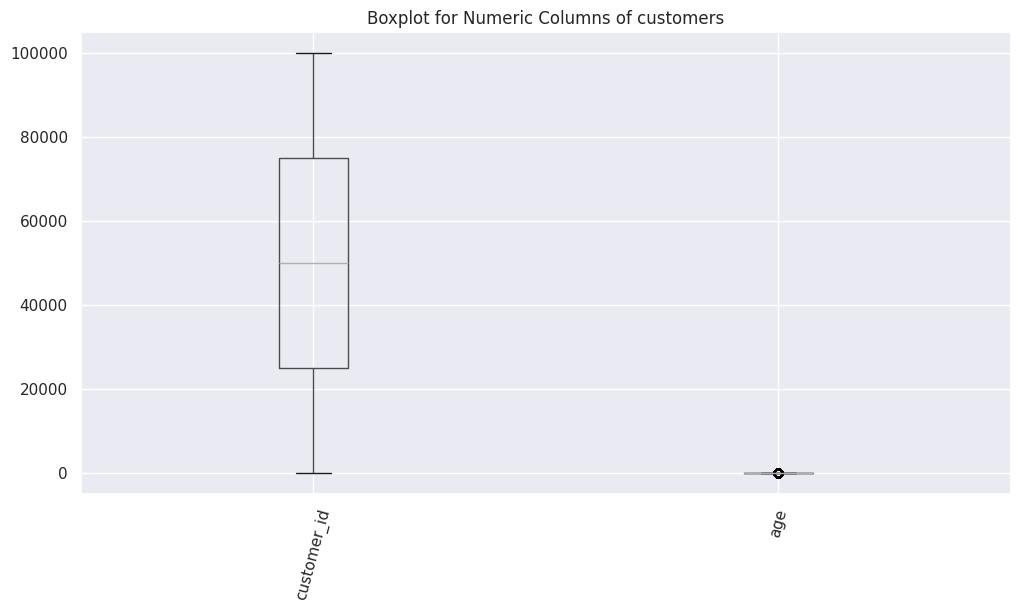

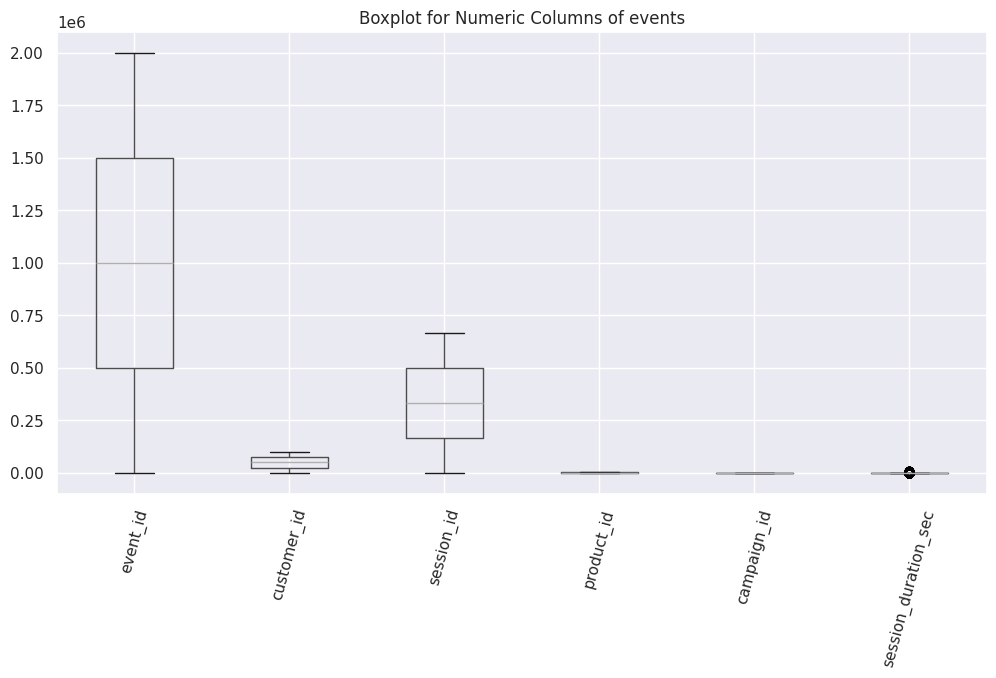

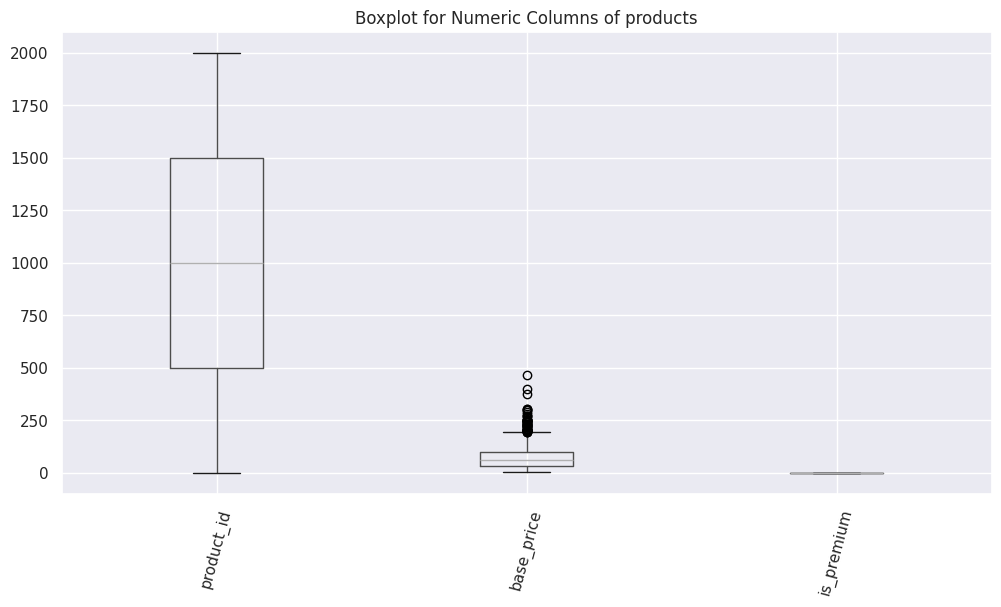

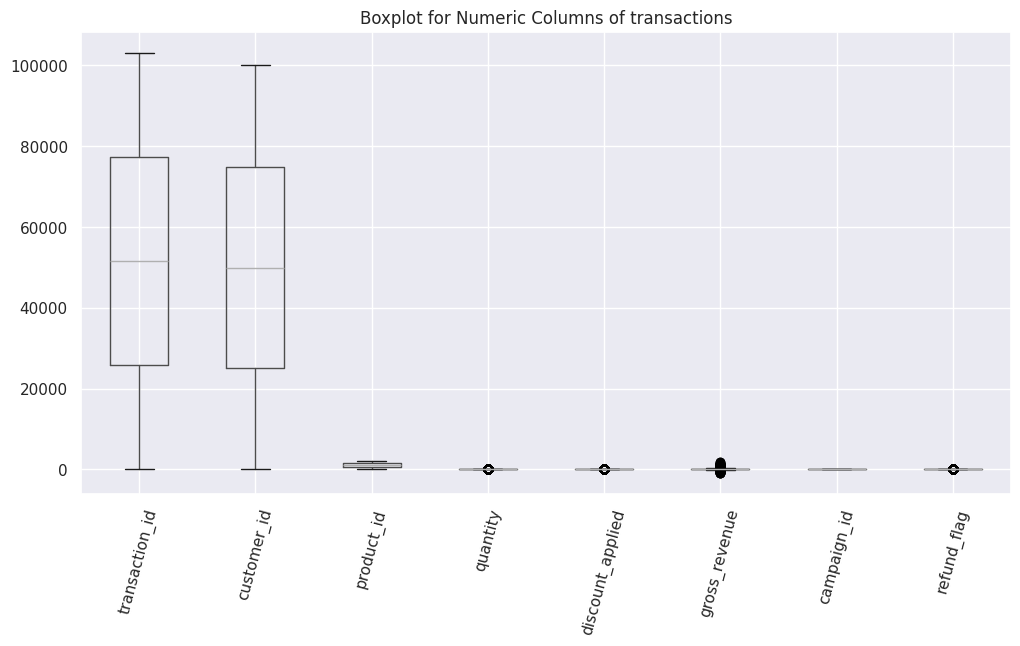

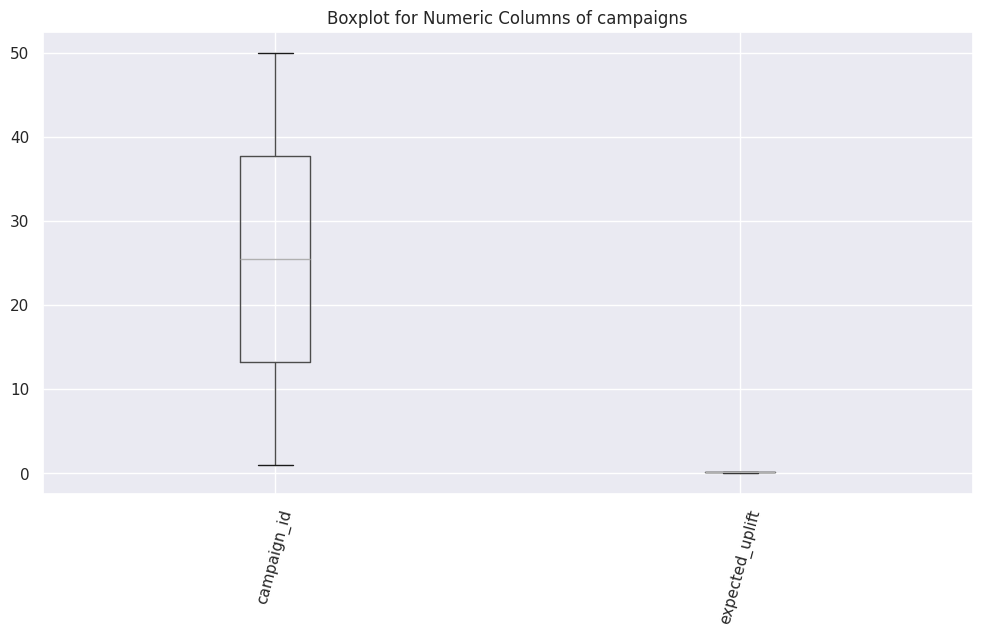

In [8]:
dfs = {
    "customers": customers,
    "events": events,
    "products": products,
    "transactions": transactions,
    "campaigns": campaigns
}

for name, df in dfs.items():
    numeric_df = df.select_dtypes(include=[float, int])
    corr = numeric_df.corr()

    if corr.empty:
        print(f"\nSkipping {name} because correlation matrix is empty or no numeric data.")
        continue

    # Plot boxplot for numeric columns to detect outliers
    plt.figure(figsize=(12, 6))
    numeric_df.boxplot()
    plt.title(f'Boxplot for Numeric Columns of {name}')
    plt.xticks(rotation=75)
    plt.show()


## 5.4 Duplicates Overview

In [9]:
dfs = {
    "customers": customers,
    "events": events,
    "products": products,
    "transactions": transactions,
    "campaigns": campaigns
}

for name, df in dfs.items():
    print(f"\nDuplicate rows for {name}:")
    duplicates = df[df.duplicated()]
    if duplicates.empty:
        print("No duplicate rows found.")
    else:
        print(duplicates)



Duplicate rows for customers:
No duplicate rows found.

Duplicate rows for events:
No duplicate rows found.

Duplicate rows for products:
No duplicate rows found.

Duplicate rows for transactions:
No duplicate rows found.

Duplicate rows for campaigns:
No duplicate rows found.


## 5.4.1 Handling Duplicates

- No duplicate records were identified in the majority the tables

## 5.5 Handling Missing values

### Strategy:
- product_id: Cannot be imputed because is a key identifier; rows with missing product_id are excluded from product-level analysis.
- gross_revenue: Missing values are not imputed because they still provide useful context for customer, campaign, and discount analysis.
- device_type: Missing values are replaced by 'unknown'

- Categorical columns: Missing values are replaced with "Unknown" to maintain categorical integrity and avoid incorrect assumptions.

- Numeric columns: Rare missing values are imputed with the median; if missingness is widespread and the column is not essential, the feature may be removed.

- High-missingness irrelevant columns: Columns containing a high proportion of missing data and not neccesary to the analysis will be dropped



## 5.5.1 Replace missing values
- Missing values are replaced by 'unknown' in device type


In [12]:
# Replace missing values in device_type with 'Unknown'
events['device_type'] = events['device_type'].fillna('Unknown')



## 5.5.2 Replace outliers with avg values

- The boxplot analysis shows no presence of significant outliers across the numeric variables.

- All detected values fall within expected and reasonable ranges for the dataset.

- Because of this, no outlier treatment is required

# 6. Correlations
- The goal of this step is to identify the relationships between the variables within the dataset.

- Understanding these correlations helps guide a more targeted and meaningful analysis, revealing how different features interact and potentially influence one another.

- A correlation heatmap will be used to visually examine these relationships, allowing for a clearer interpretation of both the strength and direction of the associations.

In [10]:
dfs = {
    "customers": customers,
    "events": events,
    "products": products,
    "transactions": transactions,
    "campaigns": campaigns
}


for name, df in dfs.items():
    numeric_df = df.select_dtypes(include=[float, int])
    print(f"\nCorrelation matrix for {name}:")
    print(numeric_df.corr())




Correlation matrix for customers:
             customer_id       age
customer_id     1.000000 -0.000567
age            -0.000567  1.000000

Correlation matrix for events:
                      event_id  customer_id  session_id  product_id  \
event_id              1.000000     0.000328    0.000224   -0.000359   
customer_id           0.000328     1.000000    0.000586    0.000154   
session_id            0.000224     0.000586    1.000000   -0.000432   
product_id           -0.000359     0.000154   -0.000432    1.000000   
campaign_id           0.000607     0.000832   -0.000618   -0.000278   
session_duration_sec -0.000074    -0.000424   -0.000176    0.000527   

                      campaign_id  session_duration_sec  
event_id                 0.000607             -0.000074  
customer_id              0.000832             -0.000424  
session_id              -0.000618             -0.000176  
product_id              -0.000278              0.000527  
campaign_id              1.000000       

# 6.1 Heatmap




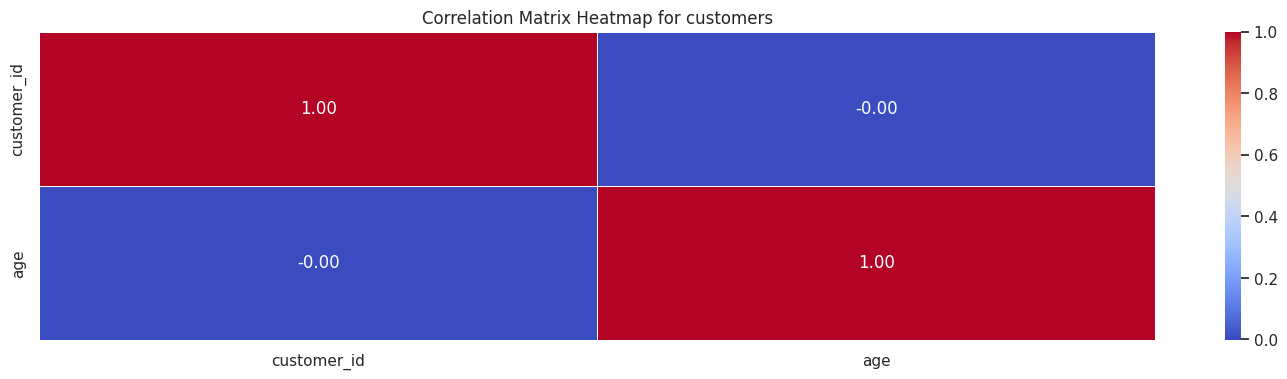

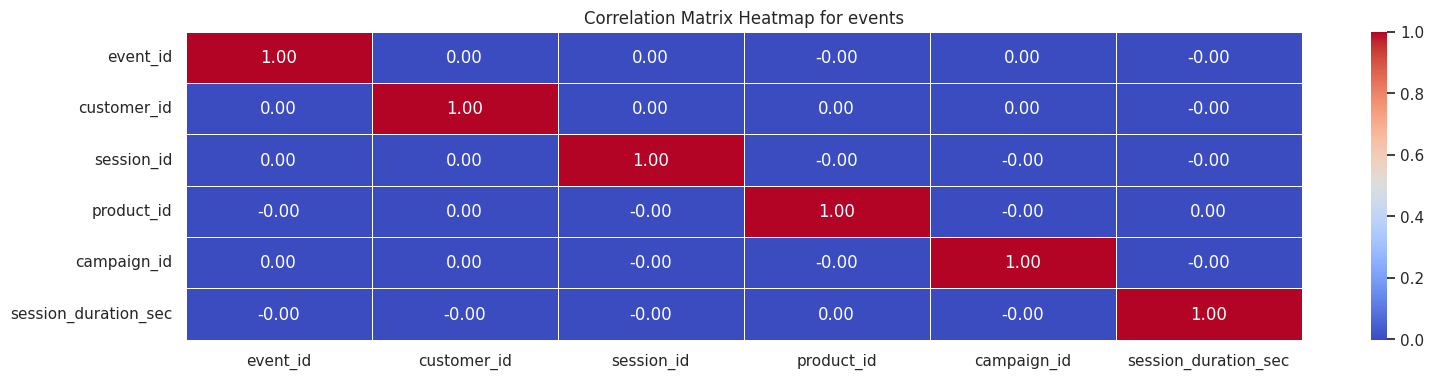

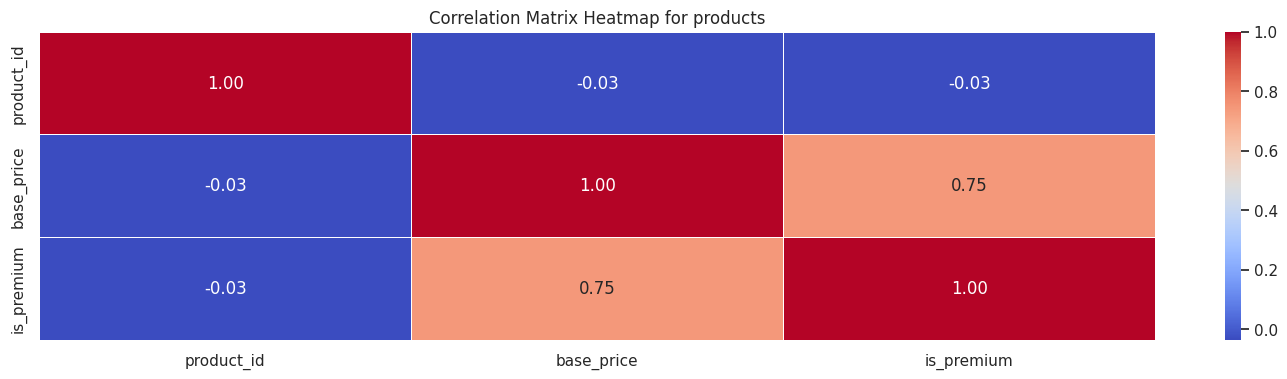

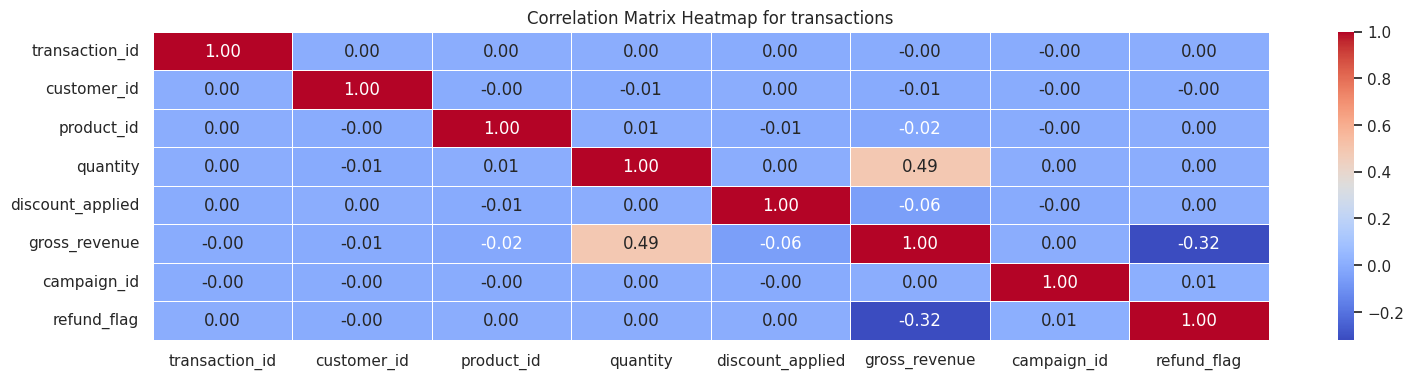

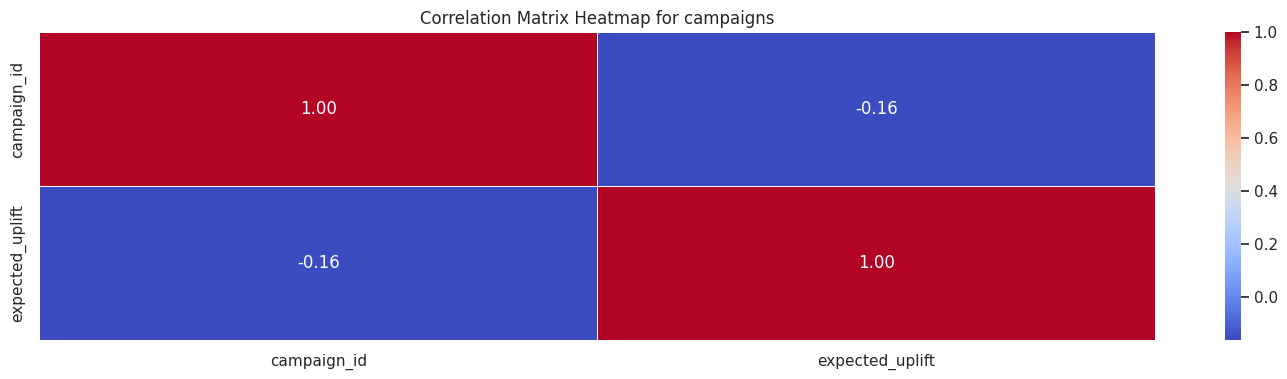

In [11]:
for name, df in dfs.items():
    numeric_df = df.select_dtypes(include=[float, int])
    corr = numeric_df.corr()

    if corr.empty:
        print(f"\nSkipping {name} because correlation matrix is empty or no numeric data.")
        continue

    plt.figure(figsize=(18,4))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Matrix Heatmap for {name}')
    plt.show()



## 6.2 Heatmap Insights

The dataset does not reveal any surprising correlations, with most variables operating independently. The only expected relationship is between base_price and is_premium, reflecting the logic that higher-priced products align with premium quality. Additionally, a moderate correlation (0.49) is observed between gross_revenue and quantity, consistent with larger purchases generating more revenue. Beyond these, no other meaningful correlations are present.



# 7. Summary


- Data Quality: The datasets overall exhibit good quality with manageable missing data.

- Missing Data: While some missing values exist, particularly in product_id, these were preserved intentionally to avoid introducing bias through imputation or deletion into the other variables.

- Outliers: Exploratory visualizations such as boxplots revealed no significant outliers that could potentially distort analyses or modeling outcomes, indicating the dataset's consistency.

- Duplicates: There were no duplicates in the datasets, which represents a adequate data integraty

- Correlations: Correlation heatmaps highlighted expected relationships among numeric variables

- **Next Steps:** The prepared datasets are now ready for advanced SQL analysis, and Tableau dashboard,
This structured cleaning and exploration provide a solid foundation for accurate funnel evaluation, campaign impact measurement, A/B test outcomes, and customer and product performance insights.


# 8 Export data to csv

In [14]:
events.to_csv('events.csv', index=False)
products.to_csv('products.csv', index=False)
transactions.to_csv('transactions.csv', index=False)
customers.to_csv('customers.csv', index=False)
campaigns.to_csv('campaigns.csv', index=False)



In [15]:
from google.colab import files

files.download('events.csv')
files.download('products.csv')
files.download('transactions.csv')
files.download('customers.csv')
files.download('campaigns.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>